# Coursework 1
**Replace CID in the file name with your CID**

# Outline


- [Task 1](#task-1): Linear regression and feature selection <a name="index-task-1"></a>
  - [(1.1)](#task-11) <a name="index-task-11"></a>
  - [(1.2)](#task-12) <a name="index-task-12"></a>
  - [(1.3)](#task-13) <a name="index-task-13"></a>
  - [(1.4)](#task-14) <a name="index-task-14"></a>
- [Task 2](#task-2): Non-linear regression with Kernel Ridge Regression <a name="index-task-2"></a>
  - [(2.1)](#task-21) <a name="index-task-21"></a>
  - [(2.2)](#task-22)  <a name="index-task-22"></a>
- [Task 3](#task-3): Classification with the Multi-Layer Perceptron <a name="index-task-3"></a>
  - [(3.1)](#task-31) <a name="index-task-31"></a>
  - [(3.2)](#task-32)  <a name="index-task-32"></a>



---



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

rng = np.random.default_rng(0)

<a name="task-1"></a>

# Task 1: Linear regression and feature selection [(index)](#index-task-1)

<a name="task-11"></a>

## (1.1) [(index)](#index-task-11)

In [3]:
def basic_graph(x, ys, labels, *, xlog=False, ylog=False, symlog=False, xlabel=None, ylabel=None):
    plt.figure()
    for i, y in enumerate(ys.T):
        plt.plot(x, y, markersize=10, label=labels[i])
    plt.xlabel("x")
    plt.ylabel("y")
    if xlog:
        plt.xscale("log")
    if ylog:
        plt.yscale("log")
    if symlog:
        plt.yscale("symlog", linthresh=0.1)
    if xlabel is not None:
        plt.xlabel(xlabel)
    if ylabel is not None:
        plt.ylabel(ylabel)
    plt.legend()
    plt.show()

In [4]:
def linear_prediction(x, beta):
    assert x.shape[1] == beta.shape
    return x @ beta

In [5]:
def ls(x_train, y):
    assert x_train.shape[0] == y_train.shape[0], "x_train and y_train must have same size"
    X = np.hstack([np.ones((x_train.shape[0], 1)), x_train])
    XX = X.T @ X
    Xy = X.T @ y
    return np.linalg.inv(XX) @ Xy

In [10]:
def garrote(x_train, y_train, lambd, n_iters=10000, step_size=10**(-7), c_huber=10**(-4)):

    assert x_train.shape[0] == y_train.shape[0], "x_train and y_train must have same size"


    n, p = x_train.shape

    ls_coeffs = ls(x_train, y_train)
    g = np.zeros(p)

    beta_ls_0 = ls_coeffs[0]
    beta_ls = ls_coeffs[1:]

    # redefinitions of y_hat and X_hat so scheme can work with LASSO definition
    y_hat = (1 / np.sqrt(n)) * (y_train - beta_ls_0)
    X_hat = (1 / np.sqrt(n)) * (x_train @ np.diag(beta_ls))

    for i in range(n_iters):
        grad_c = grad_huber(g, c_huber)
        grad_c[0] = 0

        grad = 2 * (X_hat.T @ X_hat @ g - X_hat.T @ y_hat) + lambd * grad_c

        g -= step_size * grad

    return g, beta_ls

In [11]:
def huber(beta, c=10**(-6)):
    return np.where(np.abs(beta) <= c, (beta**2)/2, c * (np.abs(beta) - c/2))

def grad_huber(beta, c=10**(-6)):
    g = np.empty_like(beta)
    return np.where(np.abs(beta) < c, beta, c * np.sign(beta))

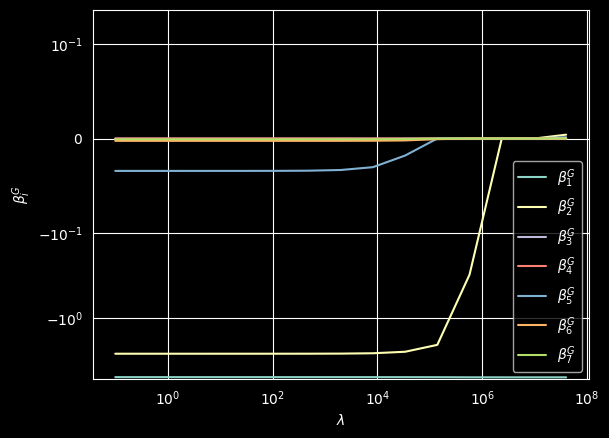

In [13]:
test_df = pd.read_csv('asteroid_observations_test.csv')
train_df = pd.read_csv('asteroid_observations_train.csv')

lambdas = np.logspace(-1, 7.6, 15)

x_train = train_df.to_numpy()[:, :7].astype(float)
y_train = train_df.to_numpy()[:, 7].astype(float)
x_test = test_df.to_numpy()[:, :7].astype(float)
y_test = test_df.to_numpy()[:, 7].astype(float)

beta_mat = np.zeros((15, 7))

for i, lambd in enumerate(lambdas):
    garrote_constants, betas = garrote(x_train, y_train, lambd)
    beta_g = np.diag(betas) @ garrote_constants
    beta_mat[i, :] = 1.0 * beta_g

basic_graph(lambdas, beta_mat, labels=[rf"$\beta^G_{i+1}$" for i in range(7)], xlog=True, symlog=True, xlabel=r"$\lambda$", ylabel=r"$\beta^G_i$")

answer here

<a name="task-12"></a>

## (1.2) [(index)](#index-task-12)

<a name="task-13"></a>

## (1.3) [(index)](#index-task-13)

<a name="task-14"></a>

## (1.4) [(index)](#index-task-14)

<a name="task-2"></a>

# Task 2: Non-linear regression with Kernel Ridge Regression [(index)](#index-task-2)

<a name="task-21"></a>

## (2.1) [(index)](#index-task-21)

In [9]:
def ridge_est(x_train, y_train, lambd=0.1):
    """
    """

    m, n = x_train.shape
    assert y_train.shape[0] == m, "x_train and y_train must have same size"

    x_aug = np.hstack([np.ones((m, 1)), x_train])
    I = np.identity(n)
    I[0] = 0.0
    beta = np.linalg.inv(x_aug.T @ x_aug + lambd * np.eye(n)) @ x_aug.T @ y_train
    return beta

<a name="task-22"></a>

## (2.2) [(index)](#index-task-22)

<a name="task-3"></a>

# Task 3: Classification with the Multi-Layer Perceptron [(index)](#index-task-3)

<a name="task-31"></a>

## (3.1) [(index)](#index-task-31)

<a name="task-32"></a>

## (3.2) [(index)](#index-task-32)